# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

as well as an

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [2]:
#Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [3]:
! ls

combined_2017.csv  starter-code.ipynb


In [4]:
#Code:
sat_df = pd.read_csv('/Users/allenwong/dsi/project_1/data/sat_2017.csv') 
act_df = pd.read_csv('/Users/allenwong/dsi/project_1/data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [5]:
#Code:
sat_df.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [6]:
act_df.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: The data shows the percentage of participation of each test by state. Both test have a score for Reading, Writing and Math feature to it. But the ACT have an extra science feature. 

#### 4a. Does the data look complete? 

Answer: Yes

In [7]:
sat_df.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer:

For SAT the minimum for Reading and Writing is 482, Math is 52, Total is 950.
For SAT the maximum for Reading and Writing is 644, Math is 651, Total is 1295.

For ACT the minimum for English is 16.3, Math is 18, Reading is 18.1, Science is 2.3.
For ACT the maximum for English is 25.5, Math is 25.3, Reading is 26, Science is 24.9.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [8]:
#code

#### 5. What are your data types? 
Display the data types of each feature. 

In [9]:
#code
act_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [10]:
sat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: For the ACT data, the composite feature is object, when it should be float.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [11]:
#code
def correct_dt(column, datatype):
    return column.apply(datatype)


In [12]:
#code
act_df.iloc[51,6] = 20.2
act_df['Composite'].tail()

47    23.8
48    21.9
49    20.4
50    20.5
51    20.2
Name: Composite, dtype: object

In [13]:
act_df['Composite'] = correct_dt(act_df['Composite'], float)

act_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), object(2)
memory usage: 3.0+ KB


- Fix any individual values preventing other columns from being the appropriate type.

- Finish your data modifications by making sure the columns are now typed appropriately.

In [14]:
#code
act_df.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

- Display the data types again to confirm they are correct.

In [15]:
#Code:
act_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), object(2)
memory usage: 3.0+ KB


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [16]:
#code
sat_df.columns = sat_df.columns.str.lower().str.replace(' ', '_').str.replace('-', '_')
sat_df.columns = ['state', 'sat_2017_participation', 'sat_2017_reading_and_writing', 
                  'sat_2017_math', 'sat_2017_total']
sat_df.columns

act_df.columns = act_df.columns.str.lower()
act_df.columns = ['state', 'act_2017_participation', 'act_2017_english', 'act_2017_math', 'act_2017_reading', 
                  'act_2017_science', 'act_2017_composite']
act_df.columns

Index(['state', 'act_2017_participation', 'act_2017_english', 'act_2017_math',
       'act_2017_reading', 'act_2017_science', 'act_2017_composite'],
      dtype='object')

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [17]:
#code

sat_df


,state,sat_2017_participation,sat_2017_reading_and_writing,sat_2017_math,sat_2017_total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [18]:
#Code:

combine_df = sat_df.merge(act_df, on='state')

combine_df.head()

,state,sat_2017_participation,sat_2017_reading_and_writing,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
0,Alabama,5%,593,572,1165,100%,18.9,18.4,19.7,19.4,19.2
1,Alaska,38%,547,533,1080,65%,18.7,19.8,20.4,19.9,19.8
2,Arizona,30%,563,553,1116,62%,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3%,614,594,1208,100%,18.9,19.0,19.7,19.5,19.4
4,California,53%,531,524,1055,31%,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [19]:
#code

combine_df.to_csv('combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [20]:
act2018_df = pd.read_csv('/Users/allenwong/dsi/project_1/data/act_2018.csv')
sat2018_df = pd.read_csv('/Users/allenwong/dsi/project_1/data/sat_2018.csv')

In [21]:
#lowercase all the columns and change to snakecase
sat2018_df.columns = sat2018_df.columns.str.lower().str.replace(' ', '_').str.replace('-', '_')
act2018_df.columns = act2018_df.columns.str.lower().str.replace(' ', '_').str.replace('-', '_')

act2018_df = act2018_df.drop(19)


In [22]:
#Update the columns with unique names

sat2018_df.columns = ['state', 'sat_2018_participation', 'sat_2018_reading_and_writing', 
                  'sat_2018_math', 'sat_2018_total']

act2018_df.columns = ['state', 'act_2018_participation', 'act_2018_composite']


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [23]:
combine2018_df = sat2018_df.merge(act2018_df, on='state') # combine the 2018 data

final = combine2018_df.merge(combine_df, on='state')



## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [123]:
#Code:
final.describe()

,sat_2018_participation,sat_2018_reading_and_writing,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,sat_2017_participation,sat_2017_reading_and_writing,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_change,act_change
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,44.820000,565.020000,557.760000,1122.880000,62.320000,21.454000,38.600000,570.860000,549.220000,1129.620000,65.920000,20.862000,21.13600,21.956000,20.992000,21.466000,6.220000,-3.600000
std,37.097604,47.010416,46.987432,92.845634,34.114118,2.111312,34.560211,44.385146,84.998269,89.913085,32.110676,2.324307,1.97399,2.046317,3.195139,2.004241,18.347318,13.584205
min,2.000000,480.000000,486.000000,998.000000,7.000000,17.700000,2.000000,503.000000,52.000000,996.000000,8.000000,16.300000,18.00000,18.100000,2.300000,17.800000,-27.000000,-70.000000
25%,4.250000,535.000000,524.250000,1062.250000,27.750000,19.925000,4.000000,535.250000,523.250000,1057.000000,31.000000,19.000000,19.40000,20.425000,19.900000,19.800000,0.000000,-4.000000
50%,50.000000,552.000000,545.500000,1098.500000,66.000000,21.050000,34.000000,559.500000,549.500000,1107.500000,71.000000,20.550000,20.90000,21.700000,21.100000,21.400000,1.000000,-1.000000
75%,74.500000,612.750000,594.250000,1207.000000,100.000000,23.650000,65.000000,613.500000,601.000000,1214.000000,100.000000,23.100000,23.00000,23.875000,22.275000,23.400000,5.000000,0.000000
max,100.000000,643.000000,655.000000,1298.000000,100.000000,25.600000,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.30000,26.000000,24.900000,25.500000,90.000000,25.000000


In [25]:
np.mean(final['sat_2018_math'])
np.std(final['sat_2018_math'])

46.51518461749884

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [26]:
final['act_2017_math'].dtype == float

True

In [27]:
#code

def standard_dev(score):
    m = np.mean(score) #find the mean
    result = []
    for s in score:
        result.append((s - m) ** 2) # subtract each number by the mean and square it, then store it in a result
    return (sum(result) / len(result)) ** .5 # find the mean of result to get the standard deviation

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [28]:
#Code:
sd = {str(c): standard_dev(final[c]) for c in final.columns if final[c].dtype == float or final[c].dtype == int}
sd

{'sat_2018_reading_and_writing': 46.537937212558106,
 'sat_2018_math': 46.51518461749884,
 'sat_2018_total': 91.9124888140888,
 'act_2018_composite': 2.090091864009809,
 'sat_2017_reading_and_writing': 43.9390532442382,
 'sat_2017_math': 84.14399324966696,
 'sat_2017_total': 89.00941298536914,
 'act_2017_english': 2.3009467616613812,
 'act_2017_math': 1.9541504548012678,
 'act_2017_reading': 2.025750231395766,
 'act_2017_science': 3.1630263988781375,
 'act_2017_composite': 1.9840977798485642}

In [29]:
final.describe()

,sat_2018_reading_and_writing,sat_2018_math,sat_2018_total,act_2018_composite,sat_2017_reading_and_writing,sat_2017_math,sat_2017_total,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000
mean,565.020000,557.760000,1122.880000,21.454000,570.860000,549.220000,1129.620000,20.862000,21.13600,21.956000,20.992000,21.466000
std,47.010416,46.987432,92.845634,2.111312,44.385146,84.998269,89.913085,2.324307,1.97399,2.046317,3.195139,2.004241
min,480.000000,486.000000,998.000000,17.700000,503.000000,52.000000,996.000000,16.300000,18.00000,18.100000,2.300000,17.800000
25%,535.000000,524.250000,1062.250000,19.925000,535.250000,523.250000,1057.000000,19.000000,19.40000,20.425000,19.900000,19.800000
50%,552.000000,545.500000,1098.500000,21.050000,559.500000,549.500000,1107.500000,20.550000,20.90000,21.700000,21.100000,21.400000
75%,612.750000,594.250000,1207.000000,23.650000,613.500000,601.000000,1214.000000,23.100000,23.00000,23.875000,22.275000,23.400000
max,643.000000,655.000000,1298.000000,25.600000,644.000000,651.000000,1295.000000,25.500000,25.30000,26.000000,24.900000,25.500000


Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: It did not match up with describe, but it match up with numpy's std method.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [188]:
final[['act_2017_composite', 'state']].sort_values(by='act_2017_composite').head()

,act_2017_composite,state
27,17.8,Nevada
23,18.6,Mississippi
39,18.7,South Carolina
10,19.0,Hawaii
32,19.1,North Carolina


In [190]:
final[['sat_2017_total', 'state']].sort_values(by='sat_2017_total').tail()

,sat_2017_total,state
15,1260,Kansas
24,1271,Missouri
14,1275,Iowa
48,1291,Wisconsin
22,1295,Minnesota


In [30]:
#code
# convert all participation percentage into int 

final['sat_2017_participation'] = final['sat_2017_participation'].str.replace('%', '').astype(int)
final['sat_2018_participation'] = final['sat_2018_participation'].str.replace('%', '').astype(int)
final['act_2017_participation'] = final['act_2017_participation'].str.replace('%', '').astype(int)
final['act_2018_participation'] = final['act_2018_participation'].str.replace('%', '').astype(int)


In [143]:
final[['act_2017_participation', 'state']].sort_values(by='act_2017_participation').head()

,act_2017_participation,state
18,8,Maine
28,18,New Hampshire
7,18,Delaware
38,21,Rhode Island
37,23,Pennsylvania


In [145]:
final[['act_2018_participation', 'state']].sort_values(by='act_2018_participation').head()

,act_2018_participation,state
18,7,Maine
38,15,Rhode Island
28,16,New Hampshire
7,17,Delaware
37,20,Pennsylvania


In [146]:
final[['sat_2018_participation', 'state']].sort_values(by='sat_2018_participation').head()

,sat_2018_participation,state
33,2,North Dakota
49,3,Wyoming
40,3,South Dakota
26,3,Nebraska
48,3,Wisconsin


In [147]:
final[['sat_2017_participation', 'state']].sort_values(by='sat_2017_participation').head()

,sat_2017_participation,state
33,2,North Dakota
23,2,Mississippi
14,2,Iowa
24,3,Missouri
43,3,Utah


Which states have the highest and lowest participation rates for the:

For ACT - Maine is the recurring states with the lowest participation.

For ACT - North Dakota

SAT - have high participation in CT, DE, MI both years
ACT - have many states with high participation

In [148]:
final[['sat_2017_participation', 'state']].sort_values(by='sat_2017_participation').tail()

,sat_2017_participation,state
18,95,Maine
28,96,New Hampshire
21,100,Michigan
7,100,Delaware
6,100,Connecticut


- Do any states with 100% participation on a given test have a rate change year-to-year?

For SAT did not drop, but actually gain 2 more states with 100% participation.

For ACT most state retain a 100% participation rate. With a few state dropping off and a few joining.

- Do any states have >50% participation on *both* tests either year?


In [35]:
final[(final['sat_2017_participation'] > 50) & (final['act_2017_participation'] > 50)]['state']

8     Florida
9     Georgia
10     Hawaii
Name: state, dtype: object

In [149]:
final[(final['sat_2018_participation'] > 50) & (final['act_2018_participation'] > 50)]['state']

8            Florida
9            Georgia
10            Hawaii
32    North Carolina
39    South Carolina
Name: state, dtype: object

In [161]:
final.loc[[8, 9, 10, 32, 39]][['state', 'sat_2018_participation', 'act_2018_participation']]

,state,sat_2018_participation,act_2018_participation
8,Florida,56,66
9,Georgia,70,53
10,Hawaii,56,89
32,North Carolina,52,100
39,South Carolina,55,100


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

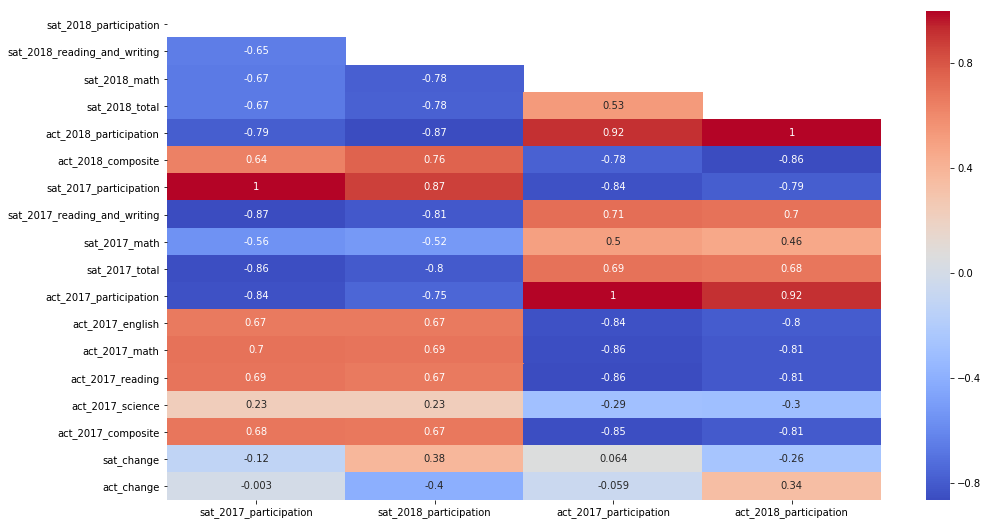

In [81]:
plt.figure(figsize=(16,9))

corr = final.corr()
part = corr[['sat_2017_participation', 'sat_2018_participation', 'act_2017_participation', 'act_2018_participation']]

mask = np.zeros_like(part, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(part, cmap='coolwarm', annot=True, mask=mask)

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [ ]:
final.columns

In [ ]:
 for i, column in enumerate(math): # Gives us an index value to get into all our lists
        if 'act' in column:
            print('act')
        else:
            print('sat')

In [329]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, sharex=False, figsize=(16,9))  # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        if 'act' in column:
            color = 'blue'
            alpha = 0.7
        else:
            color = 'orange'
            alpha = 0.8
        ax[i].hist(dataframe[column], color=color, alpha=alpha) # feel free to add more settings
        ax[i].set_title(list_of_titles[i]) # Set titles, labels, etc here for each subplot
        ax[i].set_ylabel("State", fontsize = 10)
        ax[i].axvline(dataframe[column].mean(), color='red', linewidth=2)
        
        plt.tight_layout();

In [369]:
math = ['act_2017_math', 'sat_2017_math', 'sat_2018_math']
total = ['act_2017_composite', 'sat_2017_total', 'sat_2018_total', 'act_2018_composite']
reading = ['act_2017_reading', 'sat_2017_reading_and_writing', 'sat_2018_reading_and_writing']
participation = ['sat_2018_participation', 'sat_2017_participation', 'act_2018_participation', 'act_2017_participation']

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

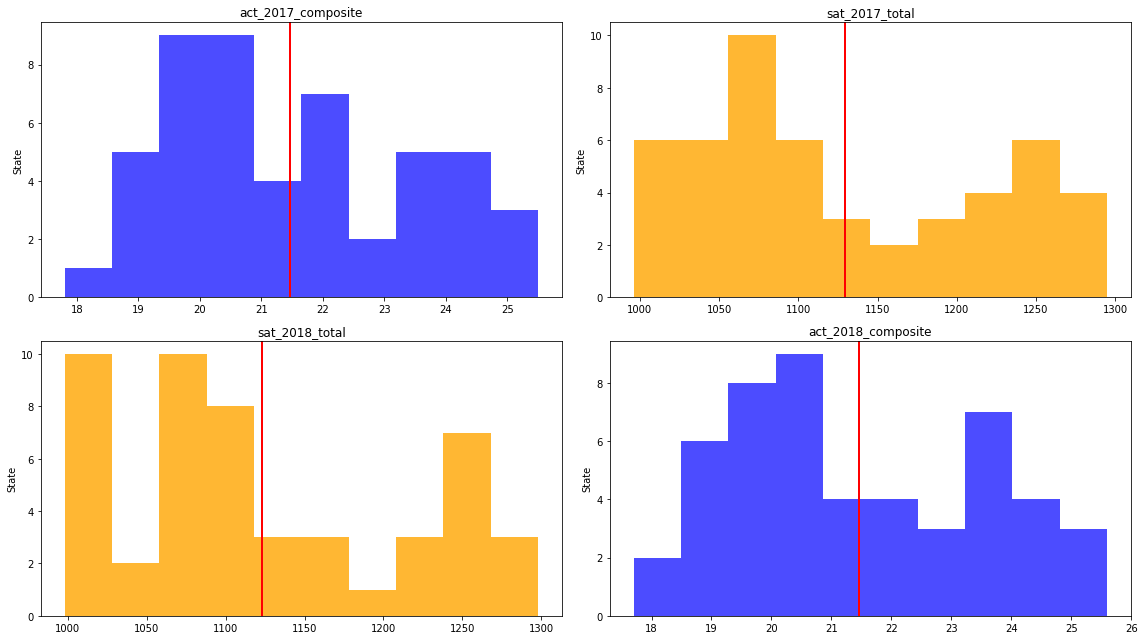

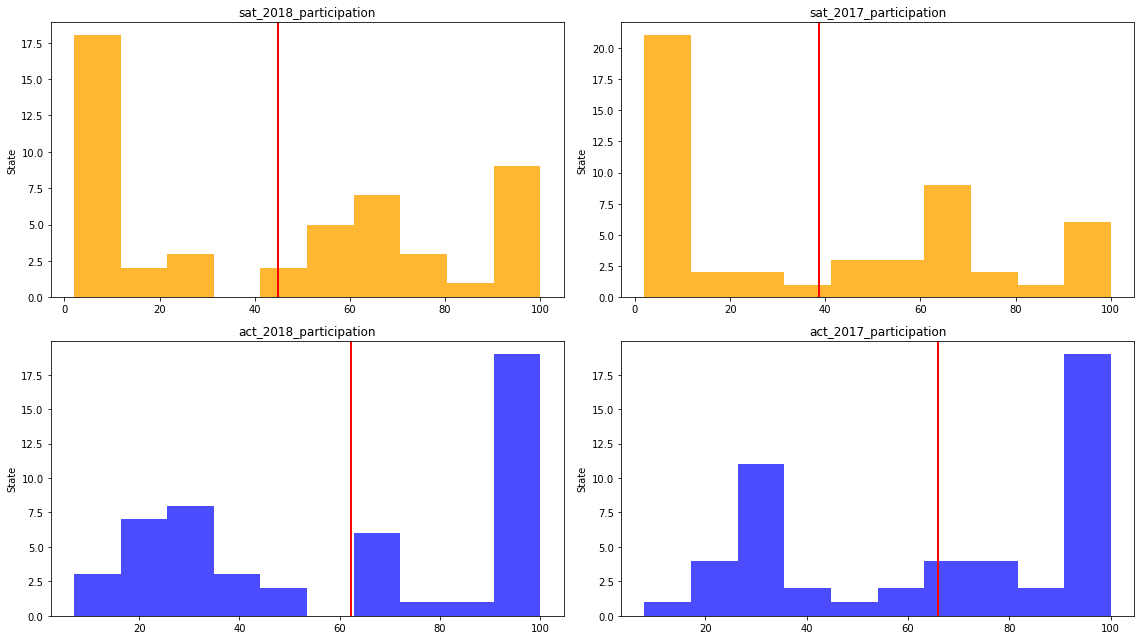

In [371]:
subplot_histograms(final, total, total, total)
subplot_histograms(final, participation, participation, participation)

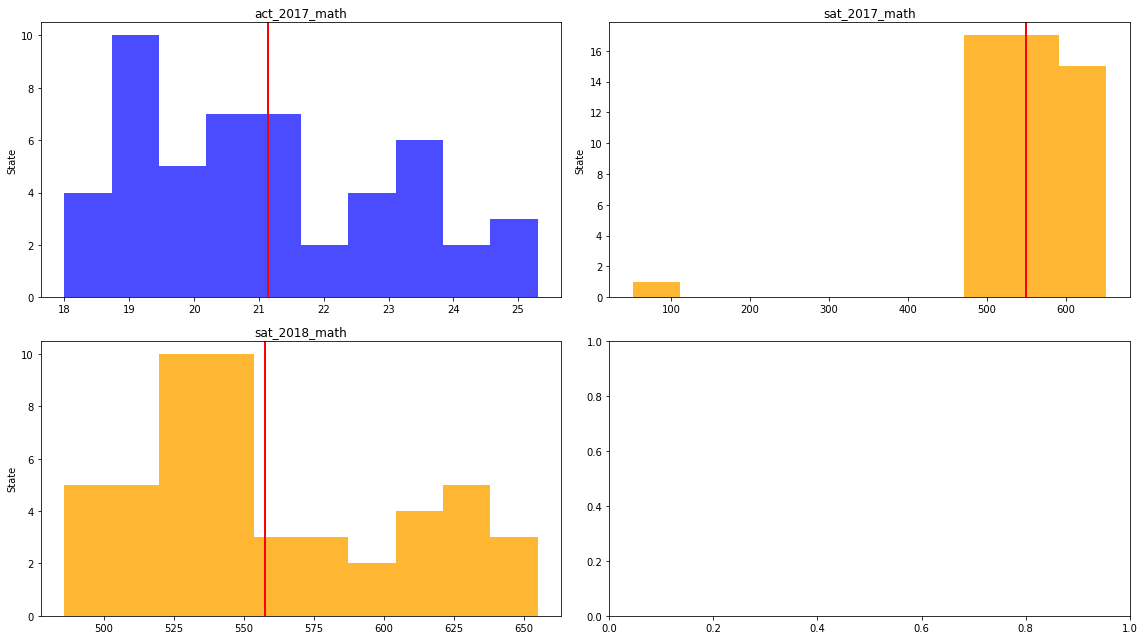

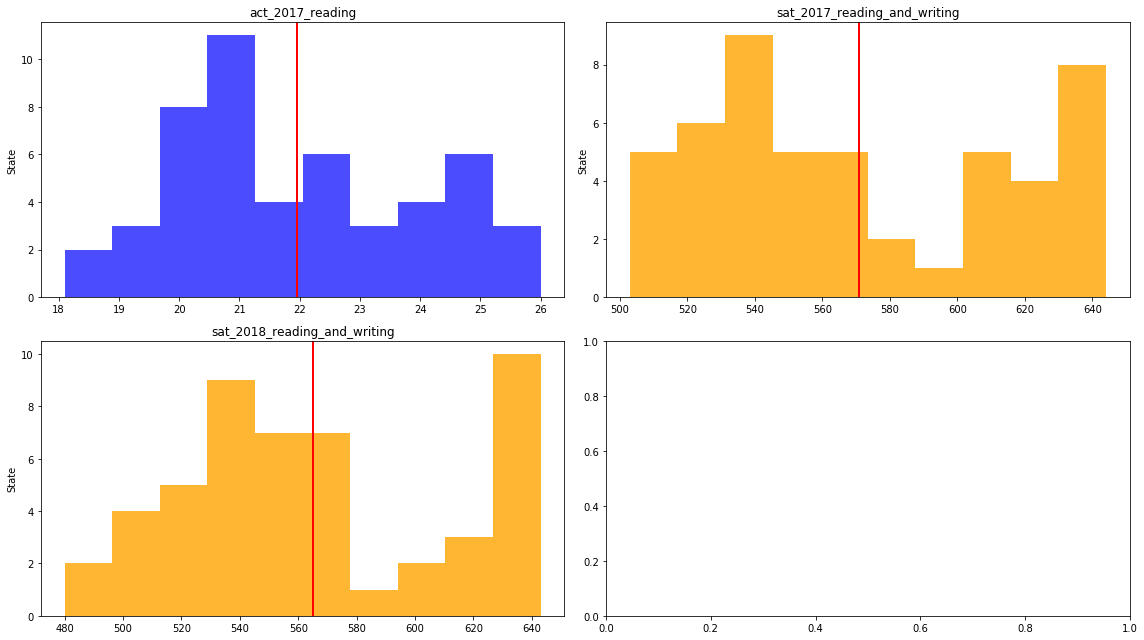

In [372]:
subplot_histograms(final, math, math, math)
subplot_histograms(final, reading, reading, reading)

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [ ]:
# Code
final.columns

In [459]:
def subplot_scatter(df, compare, against, color="blue", alpha=1):
    plt.figure(figsize=(16, 9))
    plt.scatter(df[compare], 
                df[against], color=color, alpha=alpha)

    plt.title(compare + ' vs ' + against)
    plt.ylabel(against, fontsize = 20)
    plt.xlabel(compare, fontsize = 20);

In [57]:
final.head()

,state,sat_2018_participation,sat_2018_reading_and_writing,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,sat_2017_participation,sat_2017_reading_and_writing,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_change,act_change
0,Alabama,6,595,571,1166,100,19.1,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2,1,0
1,Alaska,43,562,544,1106,33,20.8,38,547,533,1080,65,18.7,19.8,20.4,19.9,19.8,5,32
2,Arizona,29,577,572,1149,66,19.2,30,563,553,1116,62,18.6,19.8,20.1,19.8,19.7,-1,-4
3,Arkansas,5,592,576,1169,100,19.4,3,614,594,1208,100,18.9,19.0,19.7,19.5,19.4,2,0
4,California,60,540,536,1076,27,22.7,53,531,524,1055,31,22.5,22.7,23.1,22.2,22.8,7,4


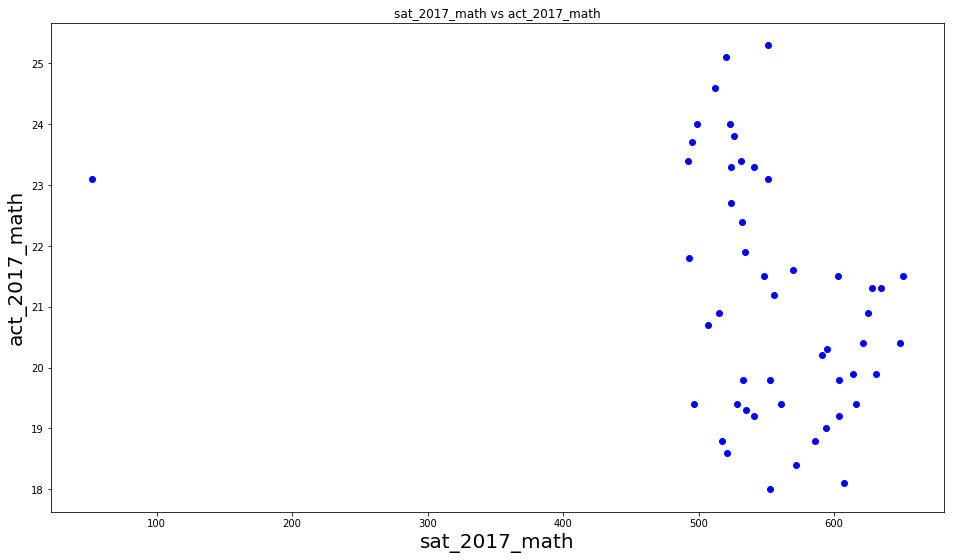

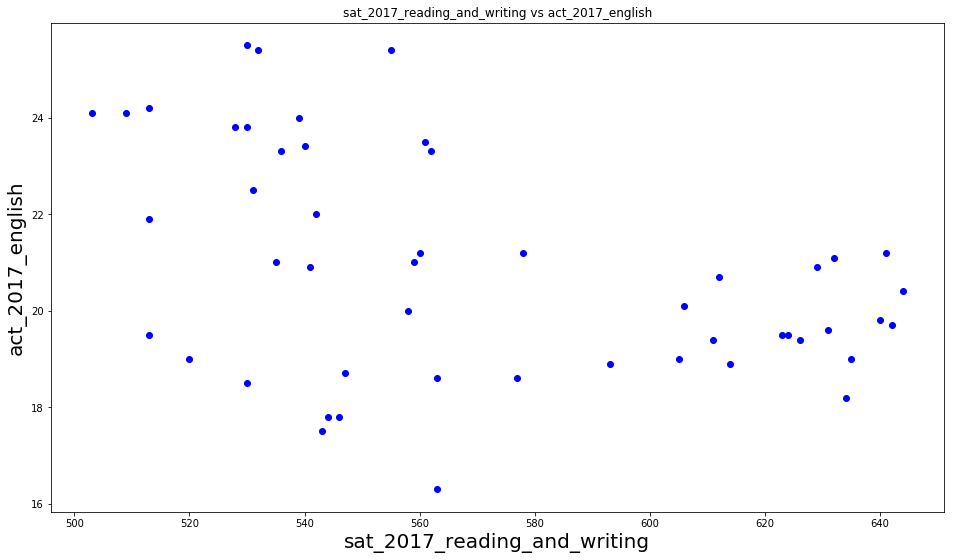

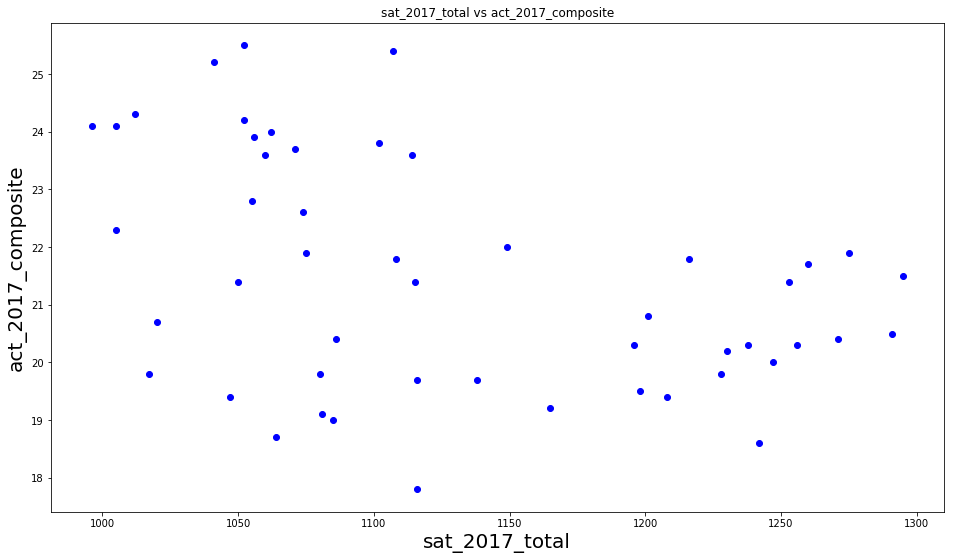

In [460]:
subplot_scatter(final, 'sat_2017_math', 'act_2017_math')
subplot_scatter(final, 'sat_2017_reading_and_writing', 'act_2017_english')
subplot_scatter(final, 'sat_2017_total', 'act_2017_composite')

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

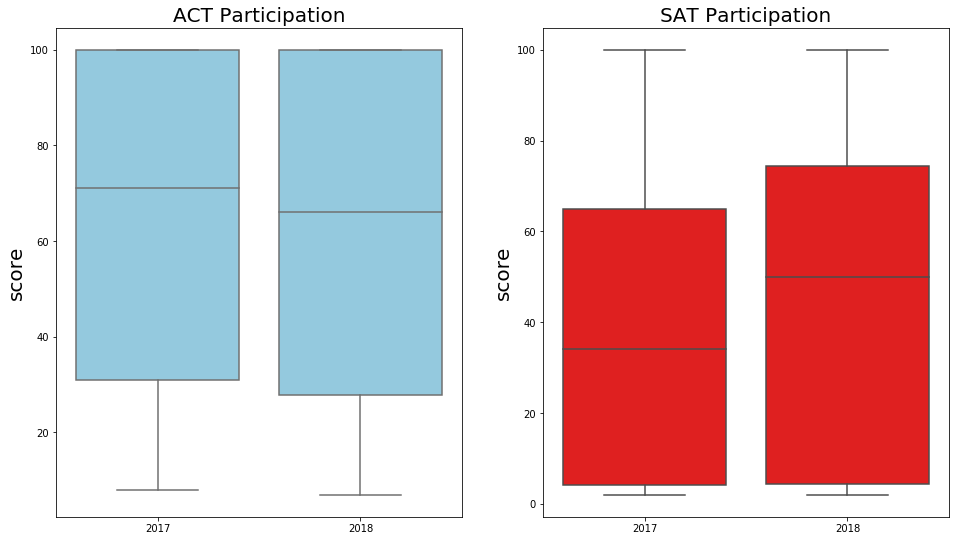

In [332]:
# Code
act_part = [final['act_2017_participation'], final['act_2018_participation']]
sat_part = [final['sat_2017_participation'], final['sat_2018_participation']]
fig, axs = plt.subplots(ncols=2, figsize=(16, 9))

sns.boxplot(data=act_part, color='skyblue', ax=axs[0]);

sns.boxplot(data=sat_part, color='red', ax=axs[1]);

axs[0].set_ylabel('score', size=20);
axs[0].set_title('ACT Participation', size=20);
axs[0].set_xticklabels(['2017', '2018']);

axs[1].set_ylabel('score', size=20);
axs[1].set_title('SAT Participation', size=20);
axs[1].set_xticklabels(['2017', '2018']);

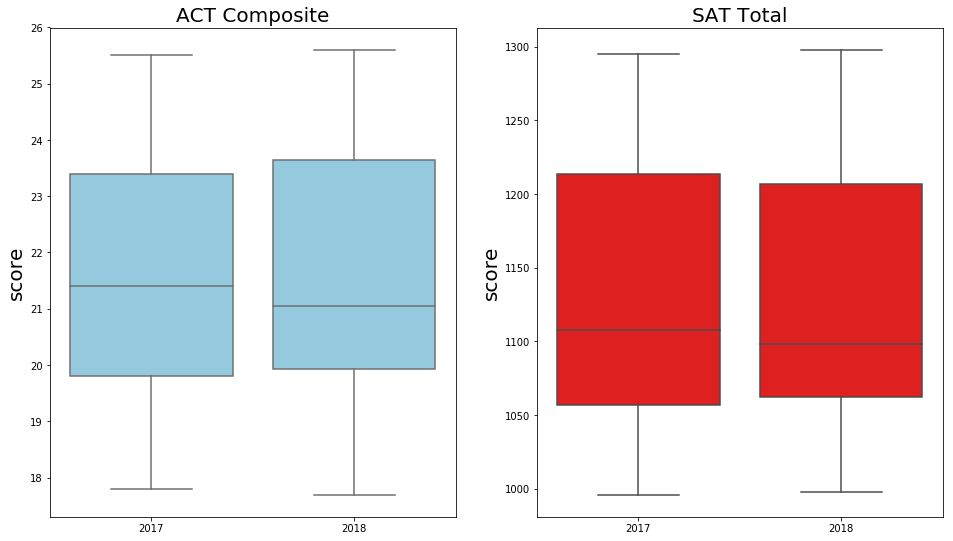

In [110]:
act_tot = [final['act_2017_composite'], final['act_2018_composite']]
sat_tot = [final['sat_2017_total'], final['sat_2018_total']]
fig, axs = plt.subplots(ncols=2, figsize=(16, 9))

sns.boxplot(data=act_tot, color='skyblue', ax=axs[0]);

sns.boxplot(data=sat_tot, color='red', ax=axs[1]);

axs[0].set_ylabel('score', size=20);
axs[0].set_title('ACT Composite', size=20);
axs[0].set_xticklabels(['2017', '2018']);

axs[1].set_ylabel('score', size=20);
axs[1].set_title('SAT Total', size=20);
axs[1].set_xticklabels(['2017', '2018']);


In [276]:
final.describe()

,sat_2018_participation,sat_2018_reading_and_writing,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,sat_2017_participation,sat_2017_reading_and_writing,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_change,act_change
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,44.820000,565.020000,557.760000,1122.880000,62.320000,21.454000,38.600000,570.860000,549.220000,1129.620000,65.920000,20.862000,21.13600,21.956000,20.992000,21.466000,6.220000,-3.600000
std,37.097604,47.010416,46.987432,92.845634,34.114118,2.111312,34.560211,44.385146,84.998269,89.913085,32.110676,2.324307,1.97399,2.046317,3.195139,2.004241,18.347318,13.584205
min,2.000000,480.000000,486.000000,998.000000,7.000000,17.700000,2.000000,503.000000,52.000000,996.000000,8.000000,16.300000,18.00000,18.100000,2.300000,17.800000,-27.000000,-70.000000
25%,4.250000,535.000000,524.250000,1062.250000,27.750000,19.925000,4.000000,535.250000,523.250000,1057.000000,31.000000,19.000000,19.40000,20.425000,19.900000,19.800000,0.000000,-4.000000
50%,50.000000,552.000000,545.500000,1098.500000,66.000000,21.050000,34.000000,559.500000,549.500000,1107.500000,71.000000,20.550000,20.90000,21.700000,21.100000,21.400000,1.000000,-1.000000
75%,74.500000,612.750000,594.250000,1207.000000,100.000000,23.650000,65.000000,613.500000,601.000000,1214.000000,100.000000,23.100000,23.00000,23.875000,22.275000,23.400000,5.000000,0.000000
max,100.000000,643.000000,655.000000,1298.000000,100.000000,25.600000,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.30000,26.000000,24.900000,25.500000,90.000000,25.000000


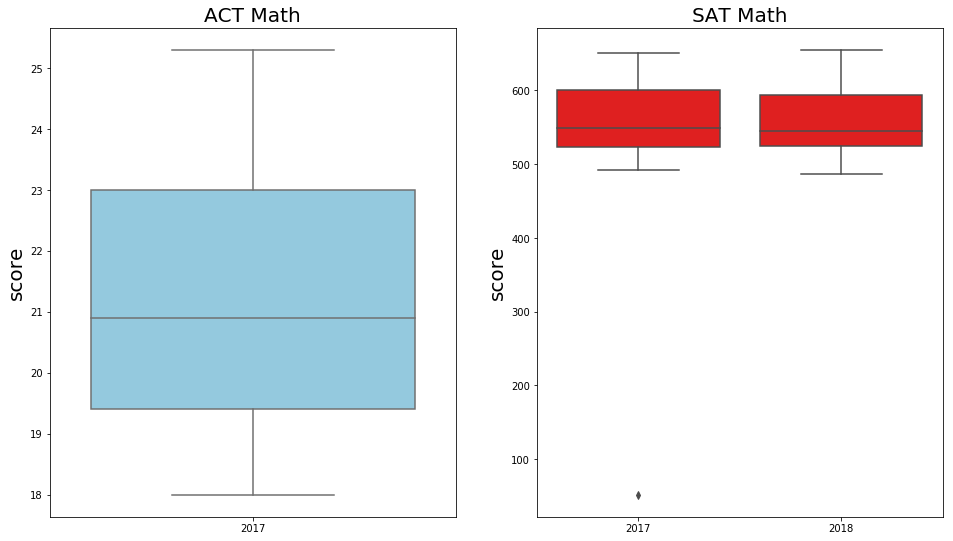

In [294]:
sat_math = [final['sat_2017_math'], final['sat_2018_math']]
act_math = [final['act_2017_math']]
fig, axs = plt.subplots(ncols=2, figsize=(16, 9))

sns.boxplot(data=sat_math, color='red', ax=axs[1]);

sns.boxplot(data=act_math, color='skyblue', ax=axs[0]);

axs[1].set_ylabel('score', size=20);
axs[1].set_title('SAT Math', size=20);
axs[1].set_xticklabels(['2017', '2018']);

axs[0].set_ylabel('score', size=20);
axs[0].set_title('ACT Math', size=20);
axs[0].set_xticklabels(['2017', '2018']);


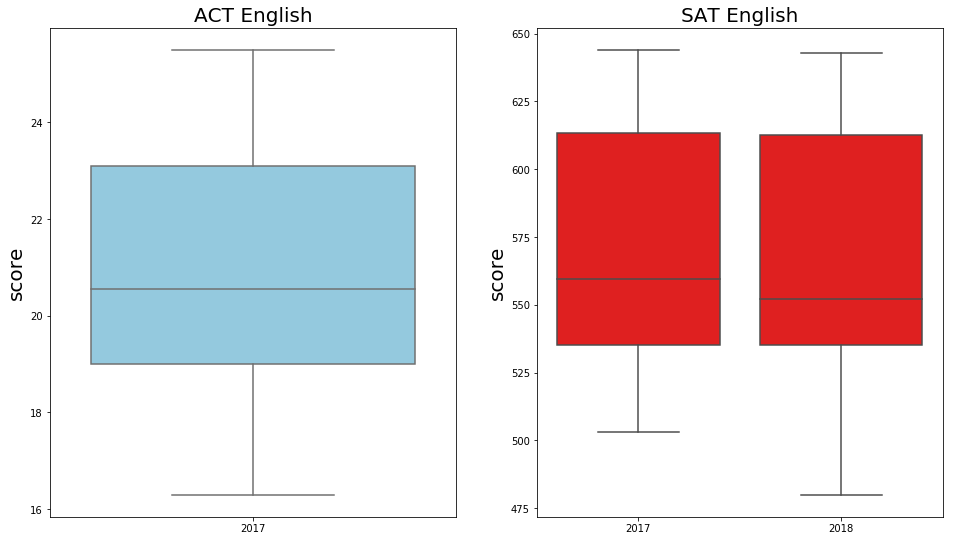

In [315]:
sat_read = [final['sat_2017_reading_and_writing'], final['sat_2018_reading_and_writing']]
act_read = [final['act_2017_english']]
fig, axs = plt.subplots(ncols=2, figsize=(16, 9))

sns.boxplot(data=sat_read, color='red', ax=axs[1]);

sns.boxplot(data=act_read, color='skyblue', ax=axs[0]);

axs[1].set_ylabel('score', size=20);
axs[1].set_title('SAT English', size=20);
axs[1].set_xticklabels(['2017', '2018']);

axs[0].set_ylabel('score', size=20);
axs[0].set_title('ACT English', size=20);
axs[0].set_xticklabels(['2017', '2018']);


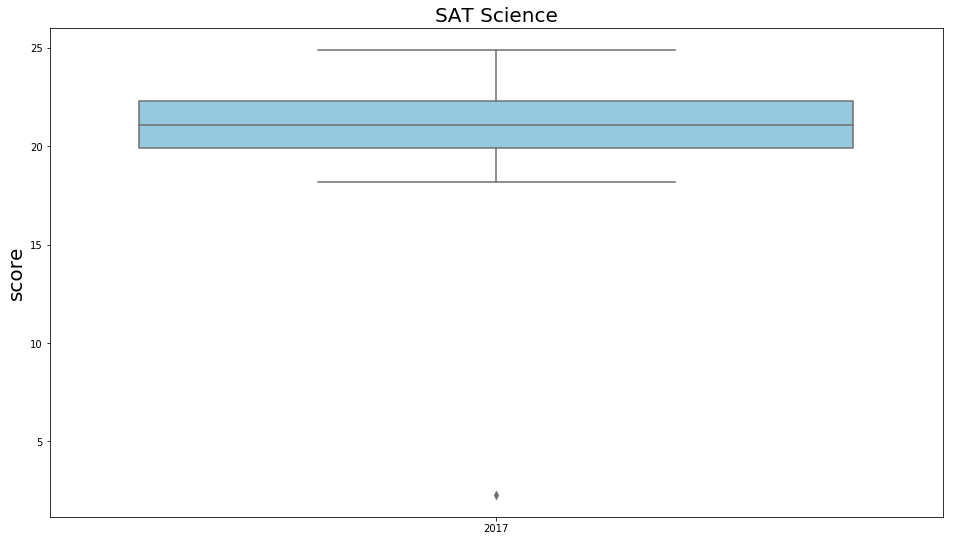

In [319]:
plt.figure(figsize=(16, 9))

ax = sns.boxplot(data=final['act_2017_science'], color='skyblue')

ax.set_ylabel('score', size=20);
ax.set_title('SAT Science', size=20);
ax.set_xticklabels(['2017', '2018']);

In [112]:
final.columns

Index(['state', 'sat_2018_participation', 'sat_2018_reading_and_writing',
       'sat_2018_math', 'sat_2018_total', 'act_2018_participation',
       'act_2018_composite', 'sat_2017_participation',
       'sat_2017_reading_and_writing', 'sat_2017_math', 'sat_2017_total',
       'act_2017_participation', 'act_2017_english', 'act_2017_math',
       'act_2017_reading', 'act_2017_science', 'act_2017_composite',
       'sat_change', 'act_change'],
      dtype='object')

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [96]:
final.columns[final.columns.str.endswith('math') & final.columns.str.startswith('sat')]

Index(['sat_2018_math', 'sat_2017_math'], dtype='object')

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: No we did not observe this trend.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: None of them have a normal distribution.

Math:
The 2017 Sat have a huge gap in the middle. Probably missing some data or the test is really easy.

Reading:
For reading is closer to a normal distribution. But for the SATs it tend to split to the sides. ACT tend to skewer toward the lower end.

Participation rate:
ACTs have high conentration with high participation. While SATs have the exact opposite.

In [ ]:
# subplot_histograms(final, math, math, math)
# subplot_histograms(final, reading, reading, reading)
# subplot_histograms(final, participation, participation, participation)


#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: No, because the data measure how many state participate. There is not much to infer from. The data answer direclty whether a state participate on one test or another or both.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

 Answer: No, because we don't know that they are equal. SAT could be easier or ACT could be harder.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [114]:
# Code:

# Created new column to measure the year to year change in participation

final['sat_change'] = final['sat_2018_participation'] - final['sat_2017_participation']

final['act_change'] = final['act_2018_participation'] - final['act_2017_participation']

part = final[['state', 'sat_change', 'sat_2017_participation', 'sat_2018_participation', 
              'act_change', 'act_2017_participation', 'act_2018_participation']]





In [118]:
part.sort_values(by='sat_change').tail(10)

,state,sat_change,sat_2017_participation,sat_2018_participation,act_change,act_2017_participation,act_2018_participation
4,California,7,53,60,-4,31,27
11,Idaho,7,93,100,-2,38,36
19,Maryland,7,69,76,3,28,31
9,Georgia,9,61,70,-2,55,53
31,New York,12,67,79,-4,31,27
29,New Jersey,12,70,82,-3,34,31
47,West Virginia,14,14,28,-4,69,65
38,Rhode Island,26,71,97,-6,21,15
5,Colorado,89,11,100,-70,100,30
12,Illinois,90,9,99,-50,93,43


In [120]:
final['act_change'].sum(), final['sat_change'].sum() # SATs have a much better year to year gain in participation

(-180, 311)

In [122]:
part.sort_values(by='act_change').tail(10)

,state,sat_change,sat_2017_participation,sat_2018_participation,act_change,act_2017_participation,act_2018_participation
3,Arkansas,2,3,5,0,100,100
32,North Carolina,3,49,52,0,100,100
49,Wyoming,0,3,3,0,100,100
30,New Mexico,5,11,16,1,66,67
14,Iowa,1,2,3,1,67,68
36,Oregon,5,43,48,2,40,42
19,Maryland,7,69,76,3,28,31
2,Arizona,-1,30,29,4,62,66
26,Nebraska,0,3,3,16,84,100
35,Ohio,6,12,18,25,75,100


In [119]:
final[['state', 'act_2017_composite', 'sat_2017_total']].sort_values(by='sat_2017_total').tail(10)

,state,act_2017_composite,sat_2017_total
43,Utah,20.3,1238
23,Mississippi,18.6,1242
16,Kentucky,20.0,1247
26,Nebraska,21.4,1253
33,North Dakota,20.3,1256
15,Kansas,21.7,1260
24,Missouri,20.4,1271
14,Iowa,21.9,1275
48,Wisconsin,20.5,1291
22,Minnesota,21.5,1295


In [183]:
final[['state', 'act_2017_participation', 'act_2017_english', 'act_2017_math',
       'act_2017_reading', 'act_2017_science', 'act_2017_composite']].sort_values('act_2017_science').tail(10)

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
37,Pennsylvania,23,23.4,23.4,24.2,23.3,23.7
38,Rhode Island,21,24.0,23.3,24.7,23.4,24.0
45,Virginia,29,23.5,23.3,24.6,23.5,23.8
7,Delaware,18,24.1,23.4,24.8,23.6,24.1
18,Maine,8,24.2,24.0,24.8,23.7,24.3
21,Michigan,29,24.1,23.7,24.5,23.8,24.1
31,New York,31,23.8,24.0,24.6,23.9,24.2
6,Connecticut,31,25.5,24.6,25.6,24.6,25.2
20,Massachusetts,29,25.4,25.3,25.9,24.7,25.4
28,New Hampshire,18,25.4,25.1,26.0,24.9,25.5


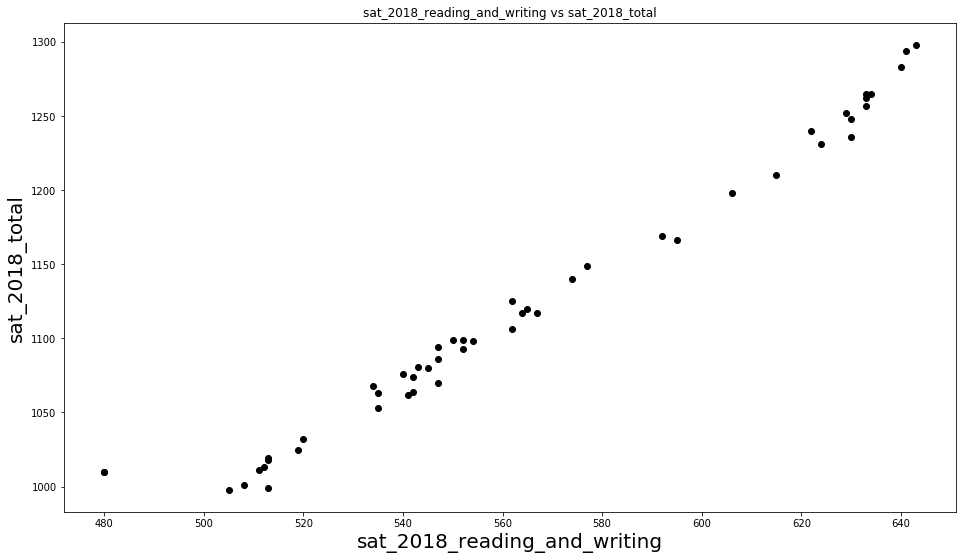

In [455]:
subplot_scatter(final, 'sat_2018_reading_and_writing', 'sat_2018_total')

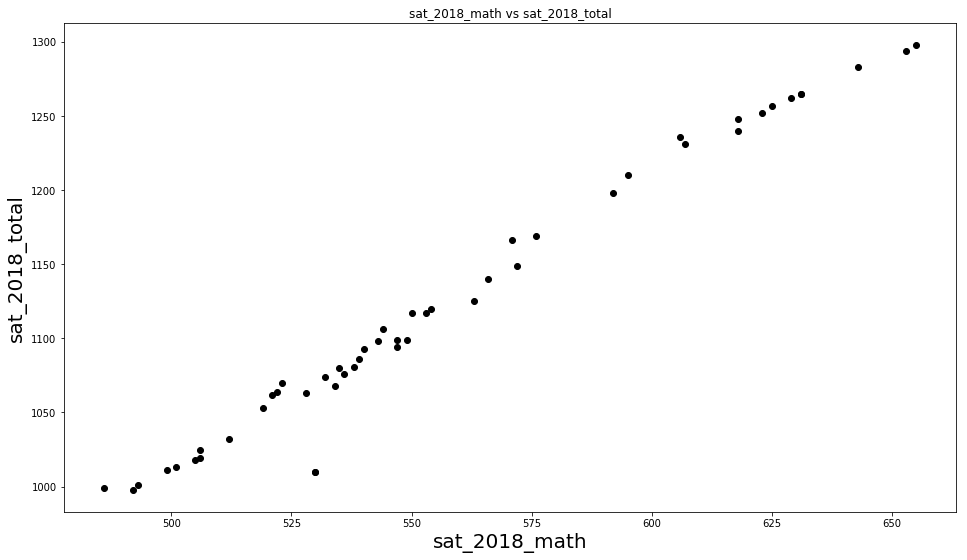

In [456]:
subplot_scatter(final, 'sat_2018_math', 'sat_2018_total')

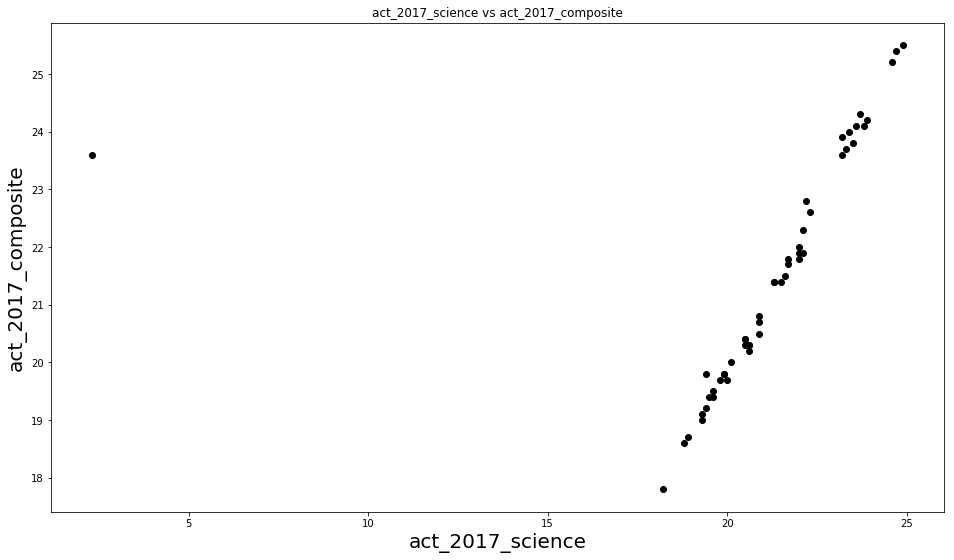

In [258]:
subplot_scatter(final, 'act_2017_science', 'act_2017_composite')

In [203]:
final.columns[final.columns.str.startswith('act')]            # Narrow all the columns to ACTs
act_2017 =final[['state', 'act_2018_participation', 'act_2018_composite',
       'act_2017_participation', 'act_2017_english', 'act_2017_math',
       'act_2017_reading', 'act_2017_science', 'act_2017_composite',
       'act_change']]
act_2017.describe()

,act_2018_participation,act_2018_composite,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,act_change
count,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000
mean,62.320000,21.454000,65.920000,20.862000,21.13600,21.956000,20.992000,21.466000,-3.600000
std,34.114118,2.111312,32.110676,2.324307,1.97399,2.046317,3.195139,2.004241,13.584205
min,7.000000,17.700000,8.000000,16.300000,18.00000,18.100000,2.300000,17.800000,-70.000000
25%,27.750000,19.925000,31.000000,19.000000,19.40000,20.425000,19.900000,19.800000,-4.000000
50%,66.000000,21.050000,71.000000,20.550000,20.90000,21.700000,21.100000,21.400000,-1.000000
75%,100.000000,23.650000,100.000000,23.100000,23.00000,23.875000,22.275000,23.400000,0.000000
max,100.000000,25.600000,100.000000,25.500000,25.30000,26.000000,24.900000,25.500000,25.000000


In [230]:
act_2017[(act_2017['act_2017_composite'] < 21.46) &     # looking for states with below avg composite score and with decent amount of participation
         (act_2017['act_2017_participation'] > 30) & 
         (act_2017['act_2017_participation'] < 80)]

,state,act_2018_participation,act_2018_composite,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,act_change
1,Alaska,33,20.8,65,18.7,19.8,20.4,19.9,19.8,-32
2,Arizona,66,19.2,62,18.6,19.8,20.1,19.8,19.7,4
8,Florida,66,19.9,73,19.0,19.4,21.0,19.4,19.8,-7
9,Georgia,53,21.4,55,21.0,20.9,22.0,21.3,21.4,-2
30,New Mexico,67,19.4,66,18.6,19.4,20.4,20.0,19.7,1
42,Texas,45,20.7,45,19.5,20.7,21.1,20.9,20.7,0
47,West Virginia,65,20.3,69,20.0,19.4,21.2,20.5,20.4,-4


In [219]:
final[final['state'] == 'West Virginia'] 
# New Mexico, Arizona, West Virgina , States narrow down to do more research

,state,sat_2018_participation,sat_2018_reading_and_writing,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,sat_2017_participation,sat_2017_reading_and_writing,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_change,act_change
47,West Virginia,28,513,486,999,65,20.3,14,558,528,1086,69,20.0,19.4,21.2,20.5,20.4,14,-4


In [223]:
three_state = part.loc[[30,47,2]] # looking at participation for both test on the states
three_state

,state,sat_change,sat_2017_participation,sat_2018_participation,act_change,act_2017_participation,act_2018_participation
30,New Mexico,5,11,16,1,66,67
47,West Virginia,14,14,28,-4,69,65
2,Arizona,-1,30,29,4,62,66


## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [254]:
part.describe() # find out what kind of participation increase is consider good.

,sat_change,sat_2017_participation,sat_2018_participation,act_change,act_2017_participation,act_2018_participation
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,6.220000,38.600000,44.820000,-3.600000,65.920000,62.320000
std,18.347318,34.560211,37.097604,13.584205,32.110676,34.114118
min,-27.000000,2.000000,2.000000,-70.000000,8.000000,7.000000
25%,0.000000,4.000000,4.250000,-4.000000,31.000000,27.750000
50%,1.000000,34.000000,50.000000,-1.000000,71.000000,66.000000
75%,5.000000,65.000000,74.500000,0.000000,100.000000,100.000000
max,90.000000,100.000000,100.000000,25.000000,100.000000,100.000000


(array([ 1.,  0., 42.,  4.,  1.,  0.,  0.,  0.,  0.,  2.]),
 array([-27. , -15.3,  -3.6,   8.1,  19.8,  31.5,  43.2,  54.9,  66.6,
         78.3,  90. ]),
 <a list of 10 Patch objects>)

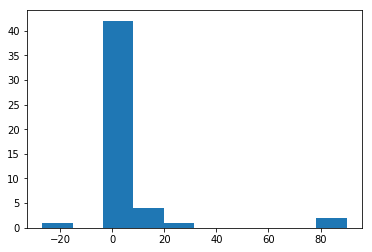

In [257]:
plt.hist(part['sat_change'])

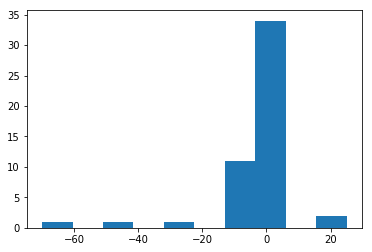

In [334]:
plt.hist(part['act_change']);

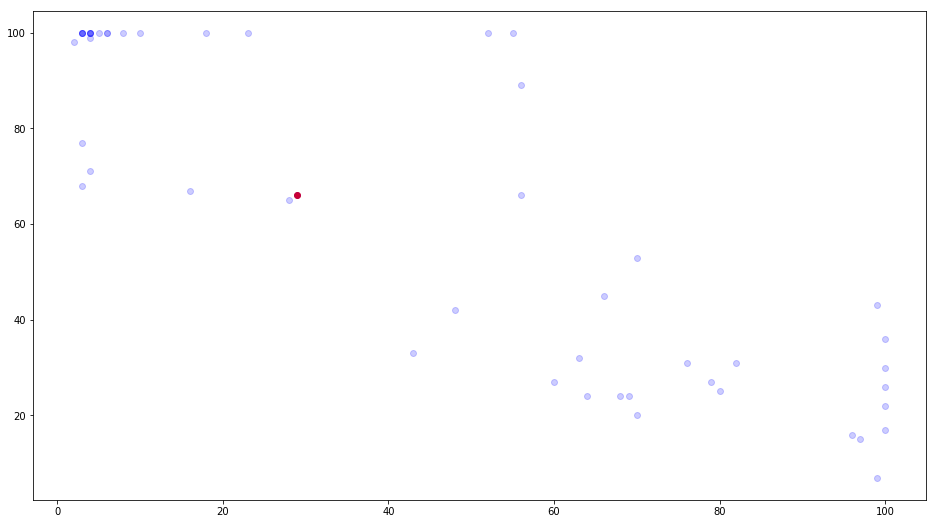

In [461]:
plt.figure(figsize=(16, 9))
plt.scatter(ariz['sat_2018_participation'], ariz['act_2018_participation'], 
            color='red', alpha=1)

plt.scatter(final['sat_2018_participation'], final['act_2018_participation'], 
            color='blue', alpha=0.2);

Text(0, 0.5, 'Participation rate')

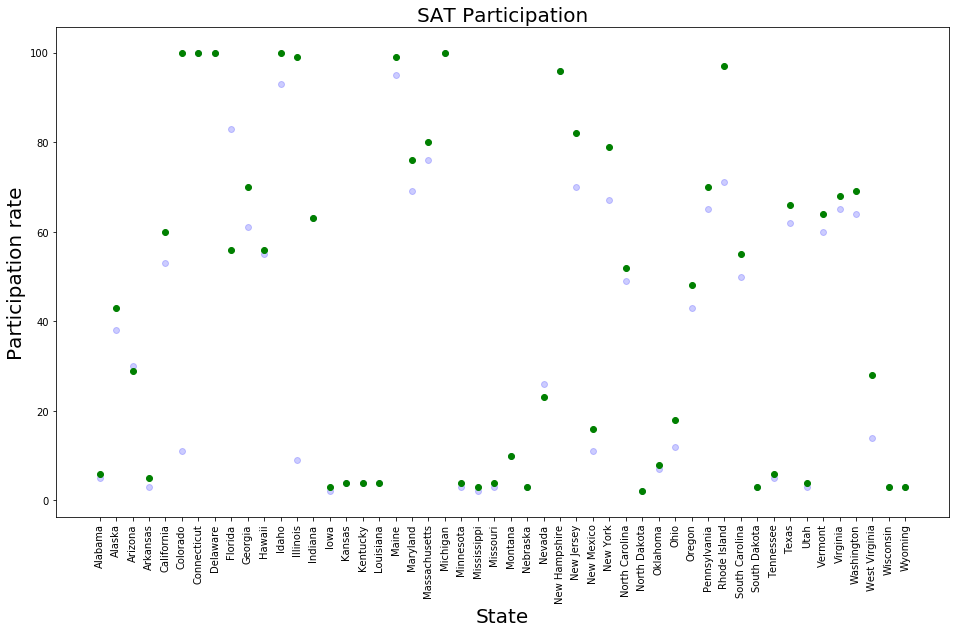

In [449]:
plt.figure(figsize=(16, 9))
plt.scatter(final['state'], final['sat_2017_participation'], 
            color='blue', alpha=.2)
plt.xticks(final['state'], rotation='vertical');

plt.scatter(final['state'], final['sat_2018_participation'], 
            color='green', alpha=1)
plt.xticks(final['state'], rotation='vertical');

plt.title('SAT Participation', size=20)
plt.xlabel('State', size=20)
plt.ylabel('Participation rate', size=20)



Text(0, 0.5, 'ACTs Score rate')

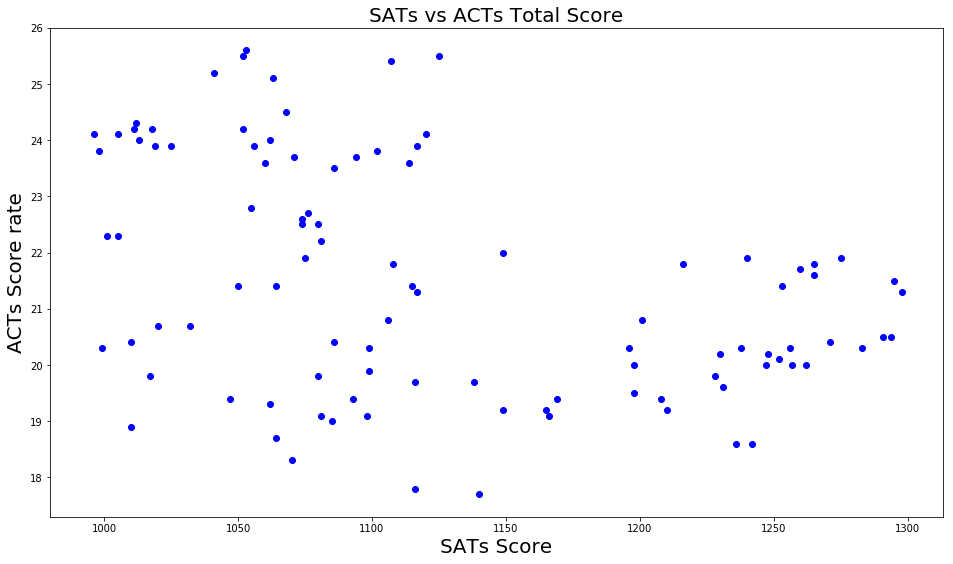

In [472]:
ariz = part.loc[2]

plt.figure(figsize=(16, 9))
plt.scatter(final['sat_2018_total'], final['act_2018_composite'], 
            color='blue', alpha=1)

plt.scatter(final['sat_2017_total'], final['act_2017_composite'], 
            color='blue', alpha=1)

plt.title('SATs vs ACTs Total Score', size=20)
plt.xlabel('SATs Score', size=20)
plt.ylabel('ACTs Score rate', size=20)

In [248]:
# Participation rates - find the biggest increase or decrease base on states (year to year)
# is there correlation between ACT vs SAT??
# is there a possiblilty of having both?
# State budget a factor?
# Mandatory for test?
# State with low score 

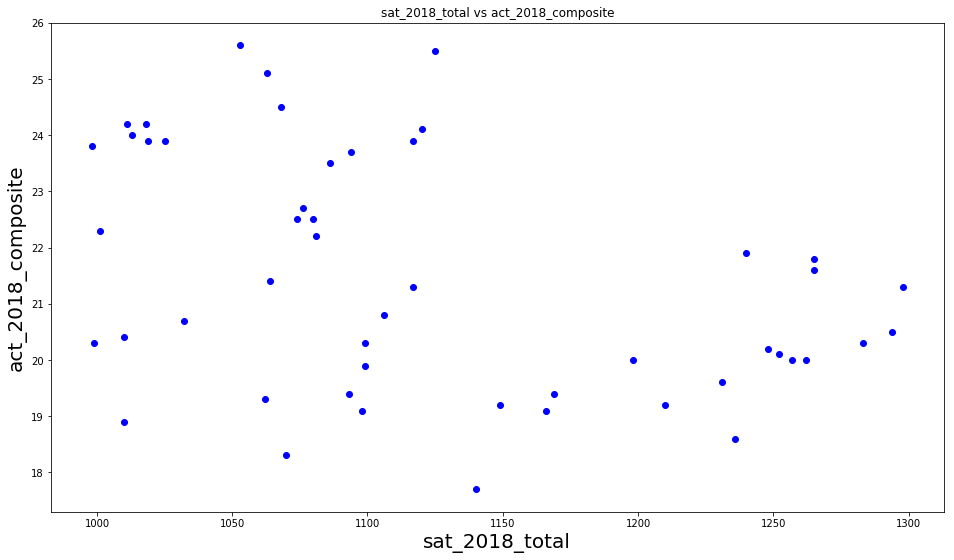

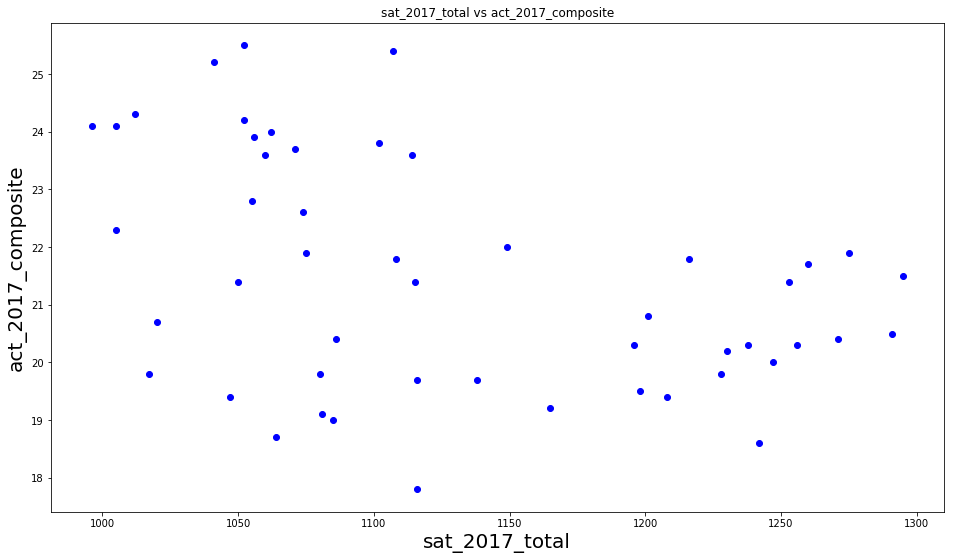

In [470]:
subplot_scatter(final, 'sat_2018_total', 'act_2018_composite')
subplot_scatter(final, 'sat_2017_total', 'act_2017_composite')

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

## Why Arizona??? It fits certain criteria that makes it attractive.

The do well on SATs and don't do well on ACTs.

   #show how some state don't need attention due to policy.

In [383]:
final[final['state'] == 'Arizona'][['sat_2018_math', 'sat_2017_math', 'act_2017_math']]

,sat_2018_math,sat_2017_math,act_2017_math
2,572,553,19.8


In [430]:
final[final['state'] == 'Arizona']['sat_2017_math']

2    553
Name: sat_2017_math, dtype: int64

In [391]:
final['ac_2017_composite'].mean()

21.465999999999998

In [367]:
final.columns[final.columns.str.endswith('math')]

Index(['sat_2018_math', 'sat_2017_math', 'act_2017_math'], dtype='object')

In [467]:
def az_tot_subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, sharex=False, figsize=(16,9))  # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        if 'act' in column:
            color = 'blue'
            alpha = 0.7
        else:
            color = 'orange'
            alpha = 0.8
        ax[i].hist(dataframe[column], color=color, alpha=alpha) # feel free to add more settings
        ax[i].set_title(list_of_titles[i], size=20) # Set titles, labels, etc here for each subplot
        ax[i].set_xlabel("Score", fontsize = 15)
        ax[i].set_ylabel("State", fontsize = 15)
        ax[i].axvline(dataframe[column].mean(), color='red', linewidth=2)
        ax[0].axvline(19.7, color='green', linewidth=4)
        ax[1].axvline(1116, color='green', linewidth=4)
        ax[2].axvline(1149, color='green', linewidth=4)
        ax[3].axvline(19.2, color='green', linewidth=4)
        
        
        
        plt.tight_layout();

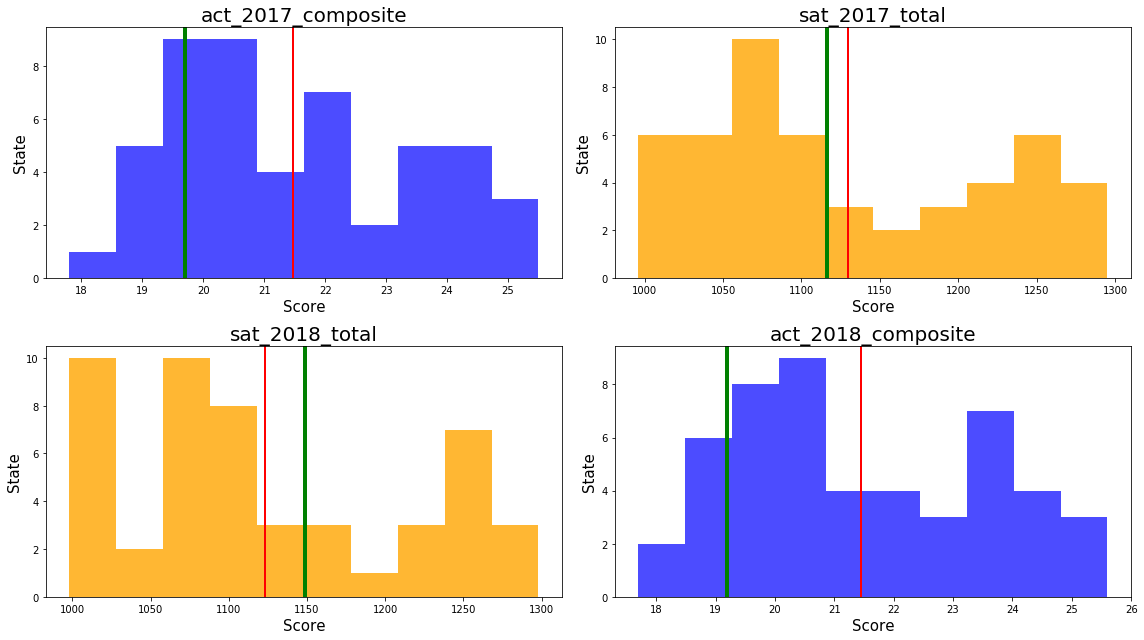

In [468]:
az_tot_subplot_histograms(final, total, total, total)


In [464]:
def az_math_subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = 3
    fig, ax = plt.subplots(nrows=nrows, ncols=1, sharex=False, figsize=(16,9))  # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        if 'act' in column:
            color = 'blue'
            alpha = 0.7
        else:
            color = 'orange'
            alpha = 0.8
        ax[i].hist(dataframe[column], color=color, alpha=alpha) # feel free to add more settings
        ax[i].set_title(list_of_titles[i]) # Set titles, labels, etc here for each subplot
        ax[i].set_ylabel("State", fontsize = 10)
        ax[i].set_ylabel("Score", fontsize = 10)
        ax[i].axvline(dataframe[column].mean(), color='red', linewidth=2)
        ax[0].axvline(19.8, color='green', linewidth=4)
        ax[1].axvline(553, color='green', linewidth=4)
        ax[2].axvline(572, color='green', linewidth=4)
        
        
        
        plt.tight_layout();

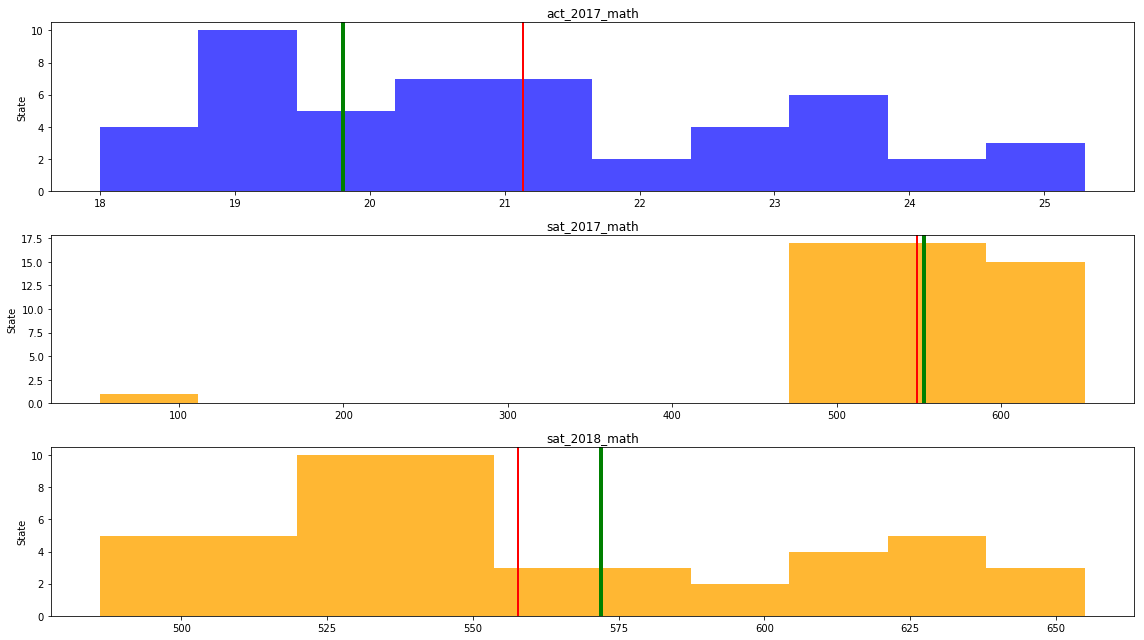

In [443]:
az_math_subplot_histograms(final, math, math, math)


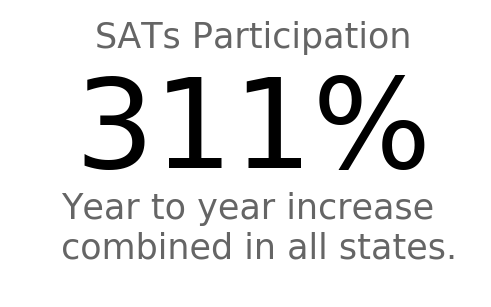

In [454]:
# Set size of figure: eight by five.
plt.figure(figsize=(8, 5))

# Create text:
plt.text(x = 0.5,                              # at horizontal = 0.5
         y = 0.9,                              # at vertical = 0.9
         s = 'SATs Participation', # content of text (string)
         ha = 'center',                        # center-aligned horizontally
         va = 'center',                        # center-aligned vertically
         size = 35,                            # font size = 35
         alpha = 0.6)                          # alpha = 0.6 --> 60% opaque; 40% clear


# Create text:
# at (horizontal = 0.5, vertical = 0.55)
# stating the percent change (s means string)
# center-aligned
# font size 125
# alpha = 1 --> totally opaque

plt.text(x = 0.5,
         y = 0.55,
         s = '311%',
         ha = 'center',
         va = 'center',
         size = 125,
         alpha = 1)

# Create text:
# at (horizontal = 0.5, vertical = 0.25)
# stating "between January 1998 and August 2013"
# with a line break in between "1998" and "and"
# center-aligned
# font size 35
# alpha = 0.6 --> 40% clear; 60% opaque
plt.text(x = 0.5,
         y = 0.2,
         s = 'Year to year increase \n combined in all states.',
         ha = 'center',
         va = 'center',
         size = 35,
         alpha = 0.6)

# No axes.
plt.axis('off');